### [pandas]코로나 확진자 관련 csv 파일로 날짜 및 시간 데이터 분석

### 1. 데이터 준비

- 데이터는 공공데이터 api를 통해 가져온 코로나 확진자 관련 csv파일을 준비한다.
- 코로나 확진자 관련데이터가 많은 2020년도 1월 20일 ~ 2022년 2월 23일까지의 시도별 코로나 확진자 현황 파일을 사용하였다.

## 2. csv 불러오기 및 데이터 타입 확인하기

#### 2.1 csv 불러오기

In [2]:
import pandas as pd
covid_df = pd.read_csv('C:/Users/USER/Covid19Korea(200120220223).csv')
covid_df.head()

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2022-02-23 09:15:35.668,16,9612,검역,隔離區,Lazaretto,46,8741,0,46,-,15285,2022년 02월 23일 00시,NaN
1,2022-02-23 09:15:35.668,17,20244,제주,济州,Jeju,1762,11681,1762,0,2991,15284,2022년 02월 23일 00시,NaN
2,2022-02-23 09:15:35.668,136,96234,경남,庆南,Gyeongsangnam-do,8023,56646,8016,7,2904,15283,2022년 02월 23일 00시,NaN
3,2022-02-23 09:15:35.668,292,71945,경북,庆北,Gyeongsangbuk-do,4996,23516,4992,4,2739,15282,2022년 02월 23일 00시,NaN
4,2022-02-23 09:15:35.667,55,43098,전남,全南,Jeollanam-do,3083,6933,3081,2,2351,15281,2022년 02월 23일 00시,NaN


#### 2.2 데이터 타입 확인하기

In [3]:
covid_df.dtypes

createDt        object
deathCnt         int64
defCnt           int64
gubun           object
gubunCn         object
gubunEn         object
incDec           int64
isolClearCnt     int64
localOccCnt      int64
overFlowCnt      int64
qurRate         object
seq              int64
stdDay          object
updateDt        object
dtype: object

- 데이터 타빙을 확인해 보면 createDt(등록일시분초), std_day(기준일시)등은 날짜형인데도 object로 설정되어 있는 것을 확인할 수 있다.
- pandas에서 날짜 계산이나 추출을 위해서는 해당 열을 datetime 형으로 바꿔줘야 올바른 계산이 가능하다.

#### datetime으로 데이터 타입 변경하기
- 날짜 데이터로 변경할 때
1. to_datetime으로 변경하는 방법
2. parse_dates=[col_idx]
- 두가지 방법으로 변경이 가능하고 2가지 방법으로 데이터 타입을 변경해 보도록 할 것이다.

In [4]:
covid_df['createDt'] = pd.to_datetime(covid_df['createDt'])
#createDt열 날짜 데이터 타입으로 변경하기

In [5]:
covid_df2 = pd.read_csv('C:/Users/USER/Covid19Korea(200120220223).csv', parse_dates=[0])
covid_df2.dtypes

createDt        datetime64[ns]
deathCnt                 int64
defCnt                   int64
gubun                   object
gubunCn                 object
gubunEn                 object
incDec                   int64
isolClearCnt             int64
localOccCnt              int64
overFlowCnt              int64
qurRate                 object
seq                      int64
stdDay                  object
updateDt                object
dtype: object

- 결과
1. 아까 object였던 createDt열이 datetime으로 변경된 것을 확인할 수 있다.
2. 추가로, stdDay도 datetime으로 바꿔보도록 하겠다.
3. stdDay는 한글이 섞여 있어 '년','월','일','시'를 제거하고 datetime으로 변경할 것이다.

In [6]:
covid_df['stdDay']=covid_df['stdDay'].replace(['년', '월', '일', '시'],"",regex=True)
covid_df[['stdDay']]

,stdDay
0,2022 02 23 00
1,2022 02 23 00
2,2022 02 23 00
3,2022 02 23 00
4,2022 02 23 00
...,...
14549,2020 01 20 00
14550,2020 01 20 00
14551,2020 01 20 00
14552,2020 01 20 00


- 결과
1. replace를 사용하여 한글을 제거해 주었다.
- 그 후 데이터 타입을 변경해줘야한다. 
1. panas에서는 format으로 시간형식 지정자를 입력하여 데이터 타입 변경도 가능하다.
2. format ='%Y-%m-%d %H:%M'등으로 지정 가능하다.

In [7]:
covid_df['stdDay'] = pd.to_datetime(covid_df['stdDay'],format ='%Y-%m-%d %H')

stdDay는 시간까지의 정보가 있으므로 시간단위까지 format으로 지정해주었다. datetime으로 변경되었다.

- 세부날짜(년, 월, 일)추출하기
1. datetime형의 데이터는 년, 월, 일등을 각각 뽑아낼 수 있다.
2. 해당 날짜 데이터 셀.year을 사용해서 아래처럼 년도를 추출할 수 있다.

In [8]:
covid_df['stdDay'][0].year

2022

* 여기서 주의할 점은 df프레임에서 바로.year을 하면 오류가 나고, covid_df['stdDay'][0]처럼 개별 데이터로 접근 후.year을 해야 웒는 정보를 찾을 수 있다.
* 열별로 한번에 데이터를 얻고 싶으면 dt를 사용하여 한번에 추출할 수 있다.
* 예시로, createDt에서 년, 월, 일을 추출해 각각 새로운 컬럼을 만들어 거기에 저장해 주도록 한다.
1. 데이터프레임열.dt.year
2. 데이터프레임열.dt.month
3. 데이터프레임열.dt.day

In [9]:
covid_df['Year'],covid_df['Month'],covid_df['Day'] = covid_df['createDt'].dt.year, covid_df['createDt'].dt.month, covid_df['createDt'].dt.day
covid_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day
0,2022-02-23 09:15:35.668,16,9612,검역,隔離區,Lazaretto,46,8741,0,46,-,15285,2022-02-23,NaN,2022,2,23
1,2022-02-23 09:15:35.668,17,20244,제주,济州,Jeju,1762,11681,1762,0,2991,15284,2022-02-23,NaN,2022,2,23
2,2022-02-23 09:15:35.668,136,96234,경남,庆南,Gyeongsangnam-do,8023,56646,8016,7,2904,15283,2022-02-23,NaN,2022,2,23
3,2022-02-23 09:15:35.668,292,71945,경북,庆北,Gyeongsangbuk-do,4996,23516,4992,4,2739,15282,2022-02-23,NaN,2022,2,23
4,2022-02-23 09:15:35.667,55,43098,전남,全南,Jeollanam-do,3083,6933,3081,2,2351,15281,2022-02-23,NaN,2022,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549,2020-01-20 09:00:00.000,0,0,전남,全南,Jeollanam-do,0,0,0,0,0.00,5,2020-01-20,2021-09-16 10:11:33.897,2020,1,20
14550,2020-01-20 09:00:00.000,0,0,경북,庆北,Gyeongsangbuk-do,0,0,0,0,0.00,4,2020-01-20,2021-09-16 10:11:33.897,2020,1,20
14551,2020-01-20 09:00:00.000,0,0,경남,庆南,Gyeongsangnam-do,0,0,0,0,0.00,3,2020-01-20,2021-09-16 10:11:33.897,2020,1,20
14552,2020-01-20 09:00:00.000,0,0,제주,济州,Jeju,0,0,0,0,0.00,2,2020-01-20,2021-09-16 10:11:33.897,2020,1,20


- 이렇게 끝에 년, 월, 일 3개의 열이 추가가 되었다.

#### 날짜의 계산
- 이번에는 날짜 계산을 해보도록 할 것이다.
- 코로나 확진자가 한국에 처음 발생한 날짜를 찾아, 발생일로부터 얼마나 지났는지 계산해 보도록 해야한다.
- 코로나 확진자가 최초로 발생한 날은 createDt열의 .min()함수를 사용하여 알 수 있다.

In [10]:
# 코로나 최초 발병일(min)로 부터 며칠이 지났는지 계산하기
## 날짜의 계산 ##
# 최초 발생자가 있는 날: 2020년 1월 20일(인천 1명)
covid_df['createDt'].min()

Timestamp('2020-01-20 09:00:00')

- 이것을 기준으로 하여 각 행마다 며칠이 지났는지 계산한다.
- 각 행의 creatDt에서 최초 발생일을 빼서 구할 수 있다.
- outbreak_day = 등록일시 - 최초발생일

In [11]:
# outbreak_day 열을 만들어 발병일로 부터 며칠 지났는지 계산하기
covid_df['outbreak_day'] = covid_df['createDt'] - covid_df['createDt'].min()
covid_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
0,2022-02-23 09:15:35.668,16,9612,검역,隔離區,Lazaretto,46,8741,0,46,-,15285,2022-02-23,NaN,2022,2,23,765 days 00:15:35.668000
1,2022-02-23 09:15:35.668,17,20244,제주,济州,Jeju,1762,11681,1762,0,2991,15284,2022-02-23,NaN,2022,2,23,765 days 00:15:35.668000
2,2022-02-23 09:15:35.668,136,96234,경남,庆南,Gyeongsangnam-do,8023,56646,8016,7,2904,15283,2022-02-23,NaN,2022,2,23,765 days 00:15:35.668000
3,2022-02-23 09:15:35.668,292,71945,경북,庆北,Gyeongsangbuk-do,4996,23516,4992,4,2739,15282,2022-02-23,NaN,2022,2,23,765 days 00:15:35.668000
4,2022-02-23 09:15:35.667,55,43098,전남,全南,Jeollanam-do,3083,6933,3081,2,2351,15281,2022-02-23,NaN,2022,2,23,765 days 00:15:35.667000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549,2020-01-20 09:00:00.000,0,0,전남,全南,Jeollanam-do,0,0,0,0,0.00,5,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14550,2020-01-20 09:00:00.000,0,0,경북,庆北,Gyeongsangbuk-do,0,0,0,0,0.00,4,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14551,2020-01-20 09:00:00.000,0,0,경남,庆南,Gyeongsangnam-do,0,0,0,0,0.00,3,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14552,2020-01-20 09:00:00.000,0,0,제주,济州,Jeju,0,0,0,0,0.00,2,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00


맨 끝에 열에 outbreak_day가 추가되었다.

#### 특정 기간의 데이터 추출
- 이번에는 특정 날짜의 데이터를 loc을 사용하여 추출할 것이다.
- df.loc[df.날짜데이터열이름.dt.(year,month,day) == 해당 (년,월,일)]
- 위 조건식처럼 지정하여 추출이 가능하다.
- 예시로 코로나 데이터의 2021년 데이터만 추출해 보도록 하겠다.

In [12]:
## 특정 기간의 데이터 추출
# 2021년 데이터 추출
test1_df = covid_df.loc[covid_df.createDt.dt.year == 2021]
test1_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
1026,2021-12-31 09:06:59.806,16,6754,검역,隔離區,Lazaretto,26,6459,0,26,-,14221,2021-12-31,NaN,2021,12,31,711 days 00:06:59.806000
1027,2021-12-31 09:06:59.805,13,4638,제주,济州,Jeju,16,4408,14,2,687,14220,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1028,2021-12-31 09:06:59.805,91,20678,경남,庆南,Gyeongsangnam-do,231,18135,228,3,619,14219,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1029,2021-12-31 09:06:59.805,161,15315,경북,庆北,Gyeongsangbuk-do,105,13377,103,2,580,14218,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1030,2021-12-31 09:06:59.805,37,6078,전남,全南,Jeollanam-do,60,5363,58,2,328,14217,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,2021-01-01 09:00:00.000,5,566,전남,全南,Jeollanam-do,6,474,6,0,30.35,6598,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days 00:00:00
7957,2021-01-01 09:00:00.000,62,2448,경북,庆北,Gyeongsangbuk-do,24,1900,24,0,91.94,6597,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days 00:00:00
7958,2021-01-01 09:00:00.000,4,1360,경남,庆南,Gyeongsangnam-do,35,1041,34,1,40.46,6596,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days 00:00:00
7959,2021-01-01 09:00:00.000,0,421,제주,济州,Jeju,5,219,5,0,62.77,6595,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days 00:00:00


- 두 가지 이상의 조건도 설정 가능하다.
#### 이때 '&'을 사용하여 and조건을 사용할 수 있다.

- df.loc[df(조건1) & df( 조건 2 ) ]

In [13]:
#2022년 1월 데이터만 추출(and 조건은 & 로 표시)
test2_df = covid_df.loc[(covid_df.createDt.dt.year == 2021) & (covid_df.createDt.dt.month == 1)]
test2_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
7372,2021-01-31 09:00:00,1420,78197,합계,合计,Total,354,67836,323,31,150.82,7182,2021-01-31,2021-09-16 10:11:33.897,2021,1,31,377 days
7373,2021-01-31 09:00:00,324,24155,서울,首尔,Seoul,100,20084,97,3,248.16,7181,2021-01-31,2021-09-16 10:11:33.897,2021,1,31,377 days
7374,2021-01-31 09:00:00,93,2756,부산,釜山,Busan,20,2280,20,0,80.78,7180,2021-01-31,2021-09-16 10:11:33.897,2021,1,31,377 days
7375,2021-01-31 09:00:00,207,8308,대구,大邱,Daegu,10,7965,9,1,340.98,7179,2021-01-31,2021-09-16 10:11:33.897,2021,1,31,377 days
7376,2021-01-31 09:00:00,50,3813,인천,仁川,Incheon,21,3424,19,2,128.99,7178,2021-01-31,2021-09-16 10:11:33.897,2021,1,31,377 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,2021-01-01 09:00:00,5,566,전남,全南,Jeollanam-do,6,474,6,0,30.35,6598,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days
7957,2021-01-01 09:00:00,62,2448,경북,庆北,Gyeongsangbuk-do,24,1900,24,0,91.94,6597,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days
7958,2021-01-01 09:00:00,4,1360,경남,庆南,Gyeongsangnam-do,35,1041,34,1,40.46,6596,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days
7959,2021-01-01 09:00:00,0,421,제주,济州,Jeju,5,219,5,0,62.77,6595,2021-01-01,2021-09-16 10:11:33.897,2021,1,1,347 days


- or 조건은 | (Shift+\) 를 사용하여 설정할 수 있습니다.
- df.loc[df(조건1) | df( 조건 2 ) ]

In [14]:
#2020년도 또는 2021년도 데이터 추출(or 조건은 | 로 표시)
test3_df = covid_df.loc[(covid_df.createDt.dt.year == 2020) | (covid_df.createDt.dt.year == 2021)]
test3_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
1026,2021-12-31 09:06:59.806,16,6754,검역,隔離區,Lazaretto,26,6459,0,26,-,14221,2021-12-31,NaN,2021,12,31,711 days 00:06:59.806000
1027,2021-12-31 09:06:59.805,13,4638,제주,济州,Jeju,16,4408,14,2,687,14220,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1028,2021-12-31 09:06:59.805,91,20678,경남,庆南,Gyeongsangnam-do,231,18135,228,3,619,14219,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1029,2021-12-31 09:06:59.805,161,15315,경북,庆北,Gyeongsangbuk-do,105,13377,103,2,580,14218,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
1030,2021-12-31 09:06:59.805,37,6078,전남,全南,Jeollanam-do,60,5363,58,2,328,14217,2021-12-31,NaN,2021,12,31,711 days 00:06:59.805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549,2020-01-20 09:00:00.000,0,0,전남,全南,Jeollanam-do,0,0,0,0,0.00,5,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14550,2020-01-20 09:00:00.000,0,0,경북,庆北,Gyeongsangbuk-do,0,0,0,0,0.00,4,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14551,2020-01-20 09:00:00.000,0,0,경남,庆南,Gyeongsangnam-do,0,0,0,0,0.00,3,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
14552,2020-01-20 09:00:00.000,0,0,제주,济州,Jeju,0,0,0,0,0.00,2,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00


- 맨 첫행 인덱스가 0이 아닌 1026으로 되어 있다. 때문에 추후 분석할 때는 인덱스를 0부터 재세팅해주는 과정이 필요한다.
- 인덱스 재세팅 방법은 날짜별 값 계산에서 확인해 봐야할 것 같다

#### 날짜별 값 계산하기(groupby)
- 사용되고 있는 데이터는 2020년부터 2022년 2월까지의 데이터를 담고 있다.
- 분석 시 년도 별 코로나 발생 인원이 몇명인지 알고 싶을 때 groupby를 사용하여 계산을 할 수 있다.
- 우선 데이터를 보면 시도 데이터 뿐만이 아니라 합계, 검역 같은 데이터 행도 있다.

- 여기서 전체 발생인원을 파악하여야 한다.
- '합계'행만 추출하여 계산하도록 한다.
- 우선 원본 df에서 gubun이 '합계'인 행만 추출해 준다.

In [15]:
# groupby를 사용하여 년도별 코로나 확진자 수 구하기
# '합계' 를 기준으로 하여 전국 년도별 코로나 확진자 수 구하기
#1. gubun 이 합계인 행만 추출하기
total_df = covid_df.loc[covid_df['gubun']=='합계']
total_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
18,2022-02-23 09:15:35.664,7607,2329182,합계,合计,Total,171452,969524,171271,181,4511,15267,2022-02-23,NaN,2022,2,23,765 days 00:15:35.664000
37,2022-02-22 09:07:42.283,7508,2157734,합계,合计,Total,99573,936891,99444,129,4179,15248,2022-02-22,NaN,2022,2,22,764 days 00:07:42.283000
56,2022-02-21 09:17:46.128,7450,2058184,합계,合计,Total,95362,905128,95218,144,3986,15229,2022-02-21,NaN,2022,2,21,763 days 00:17:46.128000
75,2022-02-20 08:53:21.986,7405,1962837,합계,合计,Total,104829,892289,104732,97,3787,15210,2022-02-20,NaN,2022,2,20,761 days 23:53:21.986000
94,2022-02-19 09:01:36.373,7354,1858009,합계,合计,Total,102211,869695,102072,139,3585,15191,2022-02-19,NaN,2022,2,19,761 days 00:01:36.373000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,2020-01-24 09:00:00.000,0,2,합계,合计,Total,1,0,0,1,0.00,95,2020-01-24,2021-09-16 10:11:33.897,2020,1,24,4 days 00:00:00
14478,2020-01-23 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,76,2020-01-23,2021-09-16 10:11:33.897,2020,1,23,3 days 00:00:00
14497,2020-01-22 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,57,2020-01-22,2021-09-16 10:11:33.897,2020,1,22,2 days 00:00:00
14516,2020-01-21 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,38,2020-01-21,2021-09-16 10:11:33.897,2020,1,21,1 days 00:00:00


- 이렇게 766행이 선택되었다.
- 여기서 첫 행이 0이 아니라, 18이다. 때문에 인덱스를 0부터 다시 설정해줘야한다.

In [16]:
# 2. index 재세팅하기
new_idx = [i for i in range(len(total_df))]
total_df.index = new_idx
total_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
0,2022-02-23 09:15:35.664,7607,2329182,합계,合计,Total,171452,969524,171271,181,4511,15267,2022-02-23,NaN,2022,2,23,765 days 00:15:35.664000
1,2022-02-22 09:07:42.283,7508,2157734,합계,合计,Total,99573,936891,99444,129,4179,15248,2022-02-22,NaN,2022,2,22,764 days 00:07:42.283000
2,2022-02-21 09:17:46.128,7450,2058184,합계,合计,Total,95362,905128,95218,144,3986,15229,2022-02-21,NaN,2022,2,21,763 days 00:17:46.128000
3,2022-02-20 08:53:21.986,7405,1962837,합계,合计,Total,104829,892289,104732,97,3787,15210,2022-02-20,NaN,2022,2,20,761 days 23:53:21.986000
4,2022-02-19 09:01:36.373,7354,1858009,합계,合计,Total,102211,869695,102072,139,3585,15191,2022-02-19,NaN,2022,2,19,761 days 00:01:36.373000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2020-01-24 09:00:00.000,0,2,합계,合计,Total,1,0,0,1,0.00,95,2020-01-24,2021-09-16 10:11:33.897,2020,1,24,4 days 00:00:00
762,2020-01-23 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,76,2020-01-23,2021-09-16 10:11:33.897,2020,1,23,3 days 00:00:00
763,2020-01-22 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,57,2020-01-22,2021-09-16 10:11:33.897,2020,1,22,2 days 00:00:00
764,2020-01-21 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,38,2020-01-21,2021-09-16 10:11:33.897,2020,1,21,1 days 00:00:00


- 0부터 765까지 전체 행의 인덱스가 잘 정리되었다.
- 그 후 groupby를 사용하여 'Year'을 기준으로 합계를 구해준다.
- 우리가 필요한 정보를 코로나 확진자 정보이므로 'incDec'(전일 대비 코로나 환자 수) 열의 합계만을 출력 할 것이다.


In [17]:
#groupby로 년도별 확진자 합계 확인하기(incDec: 전일대비 증감수)(2022년도는2월 23일까지)
defCnt_sum = total_df.groupby(['Year']).sum()
defCnt_sum[['incDec']]

,incDec
Year,
2020,60725
2021,570249
2022,1698649


- 2020년, 2021년, 2022년(1월~2월 23일까지)의 확진자 수가 집계되었다.
- 위의 데이터를 보면, 2022년도는 1,2월 두달 치의 정보만 있는데도 그 전 년도의 확진자 수를 훨씬 넘어서는 것을 확인할 수 있다.

#### 날짜를 인덱스로 설정하기
- datetime을 인덱스로 지정하면 따로 조건을 지정하지 않아도 원하는 날짜 부분의 추출이 바로 가능하다.
- 우선 합계 df인 total_df가 최신 날짜 순으로 지정되어 있어 오래된 날짜 순으로 정렬한 뒤, 인덱스를 datetime인 createDt열로 바꾼다

In [18]:
# 날짜를 인덱스로 설정하기
total_df = total_df.sort_values('createDt') #날짜 오래된 순으로 정렬
#인덱스를 createDt로 변경
total_df.index = total_df['createDt']
total_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
createDt,,,,,,,,,,,,,,,,,,
2020-01-20 09:00:00.000,2020-01-20 09:00:00.000,0,1,합계,合计,Total,0,0,0,1,0.00,19,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
2020-01-21 09:00:00.000,2020-01-21 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,38,2020-01-21,2021-09-16 10:11:33.897,2020,1,21,1 days 00:00:00
2020-01-22 09:00:00.000,2020-01-22 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,57,2020-01-22,2021-09-16 10:11:33.897,2020,1,22,2 days 00:00:00
2020-01-23 09:00:00.000,2020-01-23 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,76,2020-01-23,2021-09-16 10:11:33.897,2020,1,23,3 days 00:00:00
2020-01-24 09:00:00.000,2020-01-24 09:00:00.000,0,2,합계,合计,Total,1,0,0,1,0.00,95,2020-01-24,2021-09-16 10:11:33.897,2020,1,24,4 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 09:01:36.373,2022-02-19 09:01:36.373,7354,1858009,합계,合计,Total,102211,869695,102072,139,3585,15191,2022-02-19,NaN,2022,2,19,761 days 00:01:36.373000
2022-02-20 08:53:21.986,2022-02-20 08:53:21.986,7405,1962837,합계,合计,Total,104829,892289,104732,97,3787,15210,2022-02-20,NaN,2022,2,20,761 days 23:53:21.986000
2022-02-21 09:17:46.128,2022-02-21 09:17:46.128,7450,2058184,합계,合计,Total,95362,905128,95218,144,3986,15229,2022-02-21,NaN,2022,2,21,763 days 00:17:46.128000


- 이렇게 createDt로 인덱스가 세팅되어 있다.
- 또는 date_range를 사용해서도 날짜인텍스 설정이 가능하다.
- 이때 주의할 점은 날짜형의 열을 index로 설정 후 reindex를 해야한다.
- pd.date_range(start = '시작날짜' , end= '종료날짜')

In [19]:
# 날짜 인덱스 설정 방법2(시간 범위): date_range
index_dates = pd.date_range(start=total_df['createDt'].min(), end=total_df['createDt'].max())
# or
index_dates = pd.date_range(start='2020-01-20', end='2022-02-23')
index_dates

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               ...
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', length=766, freq='D')

In [20]:
# index_dates로 날짜형으로 변경하기
## reindex
# ※date range 사용 시에는 꼭 날짜형인 'createDt'열을 먼저 인덱스로 지정 후 아래와 같이 reindex 하기 ※
total_df.reindex(index_dates)
total_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
createDt,,,,,,,,,,,,,,,,,,
2020-01-20 09:00:00.000,2020-01-20 09:00:00.000,0,1,합계,合计,Total,0,0,0,1,0.00,19,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
2020-01-21 09:00:00.000,2020-01-21 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,38,2020-01-21,2021-09-16 10:11:33.897,2020,1,21,1 days 00:00:00
2020-01-22 09:00:00.000,2020-01-22 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,57,2020-01-22,2021-09-16 10:11:33.897,2020,1,22,2 days 00:00:00
2020-01-23 09:00:00.000,2020-01-23 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,76,2020-01-23,2021-09-16 10:11:33.897,2020,1,23,3 days 00:00:00
2020-01-24 09:00:00.000,2020-01-24 09:00:00.000,0,2,합계,合计,Total,1,0,0,1,0.00,95,2020-01-24,2021-09-16 10:11:33.897,2020,1,24,4 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 09:01:36.373,2022-02-19 09:01:36.373,7354,1858009,합계,合计,Total,102211,869695,102072,139,3585,15191,2022-02-19,NaN,2022,2,19,761 days 00:01:36.373000
2022-02-20 08:53:21.986,2022-02-20 08:53:21.986,7405,1962837,합계,合计,Total,104829,892289,104732,97,3787,15210,2022-02-20,NaN,2022,2,20,761 days 23:53:21.986000
2022-02-21 09:17:46.128,2022-02-21 09:17:46.128,7450,2058184,합계,合计,Total,95362,905128,95218,144,3986,15229,2022-02-21,NaN,2022,2,21,763 days 00:17:46.128000


- 이렇게 인덱스가 날짜형으로 세팅되면 loc을 사용할 필요없이 df['날짜']로 필요한 부분을 바로 추출할 수 있다.
- 또는 date_range를 사용해서도 날짜인덱스 설정이 가능하다.
- 여기서 주의할점은 날짜형의 열을 index로 설정한 후에 index를 해야한다.
- pd.date_range(start = '시작날짜' , end= '종료날짜')

In [21]:
# 날짜 인덱스 설정 방법2(시간 범위): date_range
index_dates = pd.date_range(start=total_df['createDt'].min(), end=total_df['createDt'].max())
# or
index_dates = pd.date_range(start='2020-01-20', end='2022-02-23')
index_dates

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               ...
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', length=766, freq='D')

In [22]:
# index_dates로 날짜형으로 변경하기
## reindex
# ※date range 사용 시에는 꼭 날짜형인 'createDt'열을 먼저 인덱스로 지정 후 아래와 같이 reindex 하기 ※
total_df.reindex(index_dates)
total_df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
createDt,,,,,,,,,,,,,,,,,,
2020-01-20 09:00:00.000,2020-01-20 09:00:00.000,0,1,합계,合计,Total,0,0,0,1,0.00,19,2020-01-20,2021-09-16 10:11:33.897,2020,1,20,0 days 00:00:00
2020-01-21 09:00:00.000,2020-01-21 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,38,2020-01-21,2021-09-16 10:11:33.897,2020,1,21,1 days 00:00:00
2020-01-22 09:00:00.000,2020-01-22 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,57,2020-01-22,2021-09-16 10:11:33.897,2020,1,22,2 days 00:00:00
2020-01-23 09:00:00.000,2020-01-23 09:00:00.000,0,1,합계,合计,Total,0,0,0,0,0.00,76,2020-01-23,2021-09-16 10:11:33.897,2020,1,23,3 days 00:00:00
2020-01-24 09:00:00.000,2020-01-24 09:00:00.000,0,2,합계,合计,Total,1,0,0,1,0.00,95,2020-01-24,2021-09-16 10:11:33.897,2020,1,24,4 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 09:01:36.373,2022-02-19 09:01:36.373,7354,1858009,합계,合计,Total,102211,869695,102072,139,3585,15191,2022-02-19,NaN,2022,2,19,761 days 00:01:36.373000
2022-02-20 08:53:21.986,2022-02-20 08:53:21.986,7405,1962837,합계,合计,Total,104829,892289,104732,97,3787,15210,2022-02-20,NaN,2022,2,20,761 days 23:53:21.986000
2022-02-21 09:17:46.128,2022-02-21 09:17:46.128,7450,2058184,합계,合计,Total,95362,905128,95218,144,3986,15229,2022-02-21,NaN,2022,2,21,763 days 00:17:46.128000


- 이렇게 인덱스가 날짜형으로 세팅이 된다면 loc를 사용할 필요없이 df['날짜']로 필요한 부분을 바로 추출할 수 있다.

In [23]:
#2020년도 12월 데이터만 추출하기
total_df['2020-12']

C:\Users\USER\AppData\Local\Temp\ipykernel_6628\3564224992.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  total_df['2020-12']


,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,Year,Month,Day,outbreak_day
createDt,,,,,,,,,,,,,,,,,,
2020-12-01 09:00:00,2020-12-01 09:00:00,526,34650,합계,合计,Total,451,27875,420,31,66.83,6023,2020-12-01,2021-09-16 10:11:33.897,2020,12,1,316 days
2020-12-02 09:00:00,2020-12-02 09:00:00,526,35161,합계,合计,Total,511,28053,492,19,67.82,6042,2020-12-02,2021-09-16 10:11:33.897,2020,12,2,317 days
2020-12-03 09:00:00,2020-12-03 09:00:00,529,35701,합계,合计,Total,540,28341,516,24,68.86,6061,2020-12-03,2021-09-16 10:11:33.897,2020,12,3,318 days
2020-12-04 09:00:00,2020-12-04 09:00:00,536,36329,합계,合计,Total,628,28599,600,28,70.07,6080,2020-12-04,2021-09-16 10:11:33.897,2020,12,4,319 days
2020-12-05 09:00:00,2020-12-05 09:00:00,540,36906,합계,合计,Total,577,28907,559,18,71.18,6099,2020-12-05,2021-09-16 10:11:33.897,2020,12,5,320 days
2020-12-06 09:00:00,2020-12-06 09:00:00,545,37537,합계,合计,Total,631,29120,599,32,72.40,6118,2020-12-06,2021-09-16 10:11:33.897,2020,12,6,321 days
2020-12-07 09:00:00,2020-12-07 09:00:00,549,38152,합계,合计,Total,615,29293,580,35,73.59,6137,2020-12-07,2021-09-16 10:11:33.897,2020,12,7,322 days
2020-12-08 09:00:00,2020-12-08 09:00:00,552,38739,합계,合计,Total,587,29640,561,26,74.72,6156,2020-12-08,2021-09-16 10:11:33.897,2020,12,8,323 days
2020-12-09 09:00:00,2020-12-09 09:00:00,556,39409,합계,合计,Total,670,30167,646,24,76.01,6175,2020-12-09,2021-09-16 10:11:33.897,2020,12,9,324 days


- 처음에는 오류가 뜨는 이유가 도대체 이유가 뭘까라고 생각했었다.
- loc를 사용할 때보다 더욱 간편하게 원하는 기간의 추출이 가능하지만, loc을 사용하라고 권장을 하고 있다.

#### 시각화
- 마지막으로 위의 날짜로 인덱스를 세팅한 데이터프레임에서 전체 기간의 코로나 확진자 수(inDec)를 시각화 해야한다.

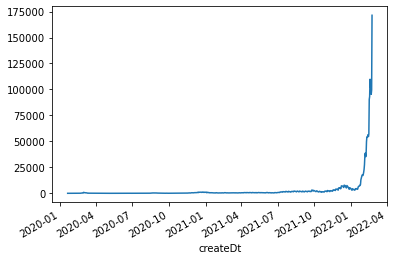

In [24]:
# 확진자 수 시각화
#그래프 그리기
import matplotlib.pyplot as plt
ax = plt.subplots()
ax = total_df['incDec'].plot()
plt.show()

- 그래프 분석 결과 2022년 4월달에서 확진자가 급격히 가파르게 증가하는 것을 볼 수 있다.